In [ ]:
import matplotlib.animation as animation
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt 
from IPython.display import HTML

from double_pendulum import Simulation, RK4, init, animate
from double_pendulum import acceleration_double_pendulum, acceleration_n_pendulum
    

In [ ]:
state = [2., 2.5, 0., 0.]
M = [1., 1.]
L = [1., 1.]
kwargs = { "M": M, "L": L, 'trail_frames': 50}


fig, ax = plt.subplots( figsize=(10,10) )
ax.set_xlim( -sum(L), sum(L) )
ax.set_ylim( -sum(L), sum(L) )

sim = Simulation( state, acceleration_double_pendulum, SSPRK3, kwargs )

init(ax,sim)

anim = animation.FuncAnimation(fig, animate, frames=2000,                       
            interval=30, blit=True, fargs=(0.0175, sim))
plt.close()

This generates a relatively compact MPEG video from the HTML5 animation

In [ ]:
HTML(anim.to_html5_video())

Plots the animation directly using an interactive HTML5 widget (a bit more memory intensive) <br>
The 'embed_limit' set maximum memory usage in bytes, set to 50 MB by default

In [ ]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 5*1e7
HTML(anim.to_jshtml())

Optionally, we can save the animation in GIF format

In [ ]:
anim.save('example.gif', writer='imagemagick', fps=30)

In [2]:
import numpy as np

def SSPRK3(t, h, state, f, kwargs):
    """
    Implements a four-stage Strong Stability Preserving Runge-Kutta 3 method
    It has a large region of stability and allows for larger step sizes (CFL < 2) 
    """
    dim = len(state)//2
    S = [ np.asarray(state) ] + [ np.zeros_like(state) for i in range(4) ]
    C = [ [ (0,0.5) ], [ (1, 0.5) ], [ (0,2./3.), (2,1./6.) ], [ (3,0.5) ] ]
    B = [ (0.5, 0, 0), (0.5, 1, h/2.), (1./6., 2, h), (0.5, 3, h/2.) ]
    
    for i in range(4):
        b, k, dt = B[i]
        A = f(t + dt, S[k], kwargs)
        S[i+1] = b * (S[k] + h * A ) 
        for j, c in C[i]:
            S[i+1] += c * S[j]
    return S[-1]


In [ ]:
SSPRK3(0, 0.005, state, acceleration_n_pendulum, sim.kwargs)

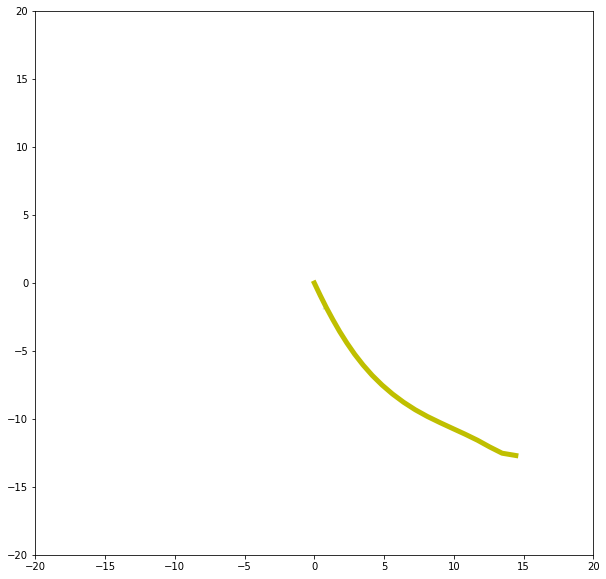

In [3]:
import matplotlib.animation as animation
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt 
from IPython.display import HTML

N = 20

state = [ 1 + 0.33*(n+1)/float(N) for n in range(N) ] + [0.] * N
M = [1.] * N
L = [1.] * N
kwargs = { "M": M, "L": L, 'trail_frames': 50}


plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 510219680

fig, ax = plt.subplots( figsize=(10,10) )
ax.set_xlim( -sum(L), sum(L) )
ax.set_ylim( -sum(L), sum(L) )

sim = Simulation( state, acceleration_n_pendulum, SSPRK3, kwargs )
plots = init(ax, sim)


anim = animation.FuncAnimation(fig, animate, frames=3000,                       
            interval=3, blit=True, fargs=(0.005, sim))

#HTML(anim.to_jshtml())
HTML(anim.to_html5_video())


In [ ]:
state